In [45]:
from pearce.mocks.kittens import cat_dict
import numpy as np

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [47]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0}

In [48]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [49]:
cat.load(2.0/3.0, HOD='abRedMagic')

In [50]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo']

In [63]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']/cat.pmass >= 1e3

In [52]:
print float(sum(mass_cut))/len(mass_cut)

0.00204367712174


In [53]:
print cat.pmass

591421440.0


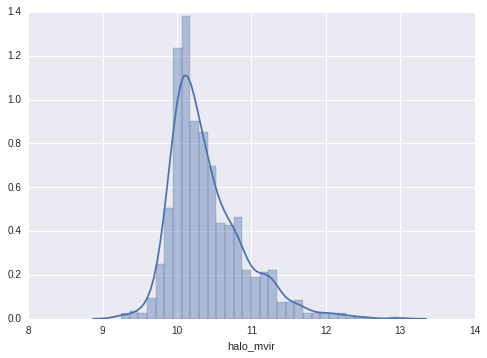

In [54]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

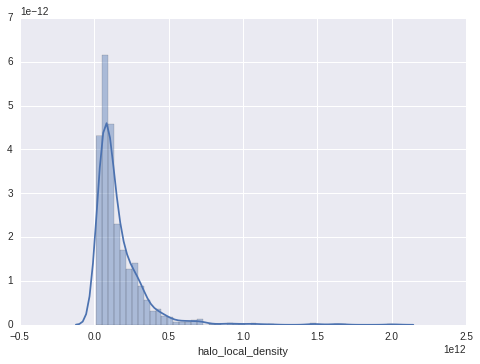

In [55]:
sns.distplot(cat.halocat.halo_table['halo_local_density'][rand_idxs], hist=True, kde=True)

In [56]:
print min(cat.halocat.halo_table['halo_local_density'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density'][rand_idxs])

12876661921.7
2.00830744709e+12


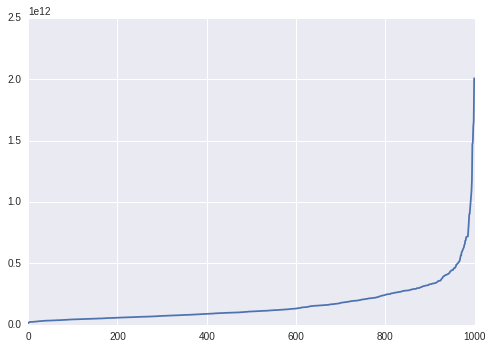

In [57]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]))

In [58]:
vol = 4*np.pi/3*(5**3)

In [59]:
print sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]*vol/(100*cat.pmass))[:50]

[113.99999999999999, 168.99999999999994, 175.0, 200.99999999999997, 201.99999999999997, 202.99999999999997, 205.99999999999997, 208.99999999999997, 209.99999999999997, 212.99999999999997, 214.99999999999997, 214.99999999999997, 216.99999999999997, 220.99999999999997, 228.99999999999997, 230.99999999999994, 234.99999999999997, 236.99999999999997, 238.99999999999997, 239.99999999999997, 241.99999999999997, 242.99999999999997, 250.99999999999997, 251.99999999999994, 256.99999999999994, 263.99999999999994, 263.99999999999994, 265.99999999999994, 266.99999999999994, 268.99999999999994, 269.99999999999994, 271.99999999999994, 278.99999999999994, 278.99999999999994, 279.99999999999994, 285.99999999999994, 290.99999999999994, 291.99999999999994, 292.99999999999994, 293.99999999999994, 294.99999999999994, 296.99999999999994, 298.0, 300.99999999999994, 300.99999999999994, 302.0, 305.99999999999994, 308.0, 309.99999999999994, 311.99999999999994]


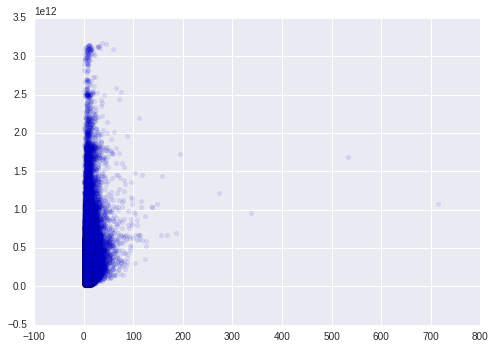

In [64]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], alpha=0.1)

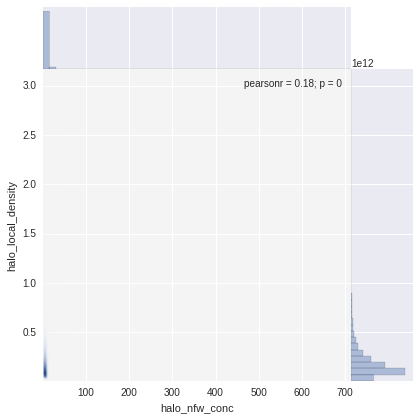

In [68]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], kind = 'hex', space=0)

In [69]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

0.128879922197


In [18]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [19]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 0.5,
 'mean_occupation_satellites_assembias_param1': 0.5,
 'sigma_logM': 0.46}

In [20]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [21]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

'mean_occupation_centrals_assembias_param1'

In [22]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 1.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = -1.0

In [23]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [24]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 1.0,
 'mean_occupation_satellites_assembias_param1': -1.0,
 'sigma_logM': 0.46}

In [25]:
cat.calc_number_density()

0.000702390625

In [26]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [27]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [28]:
wp_vals.shape

(10, 14)

In [29]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

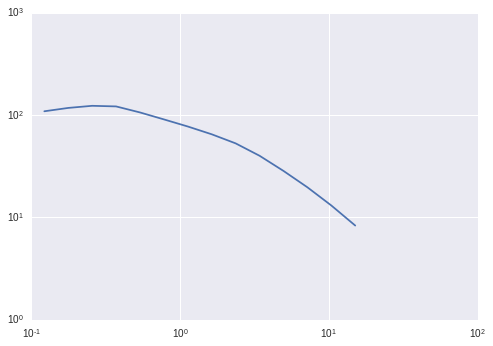

In [30]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [31]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

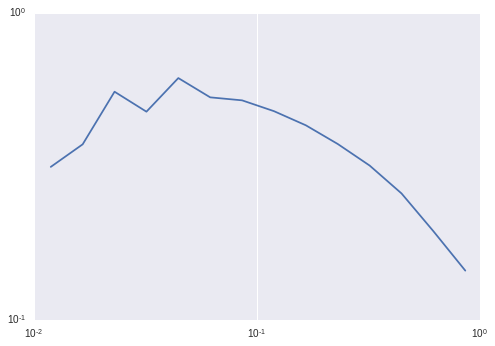

In [32]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [33]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [34]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [35]:
errs = np.sqrt(np.diag(cov))
print errs

[ 0.          0.96593169  1.56285596  1.09778938  0.41129751  0.19321858
  0.08927344  0.06410266  0.03837146  0.0230009   0.01273415]


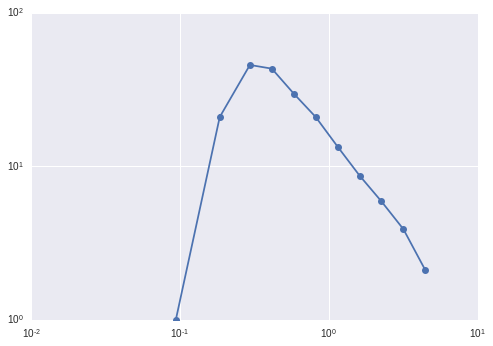

In [36]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [37]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [38]:
errs = np.sqrt(np.diag(cov))
print errs

[ 0.06473235  0.52295449  0.55218201  0.51909273  0.19873099  0.15605806
  0.08170996  0.06359723  0.03826213  0.02309736  0.01218833]


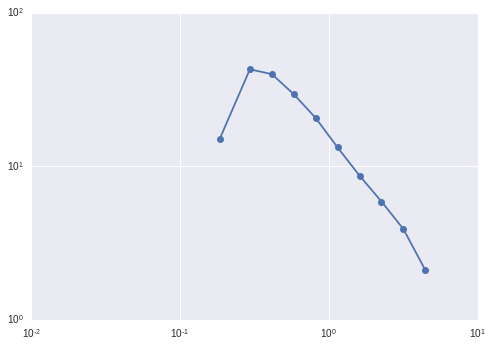

In [39]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()